# Expedia Hotel Recommendations

#### Which hotel type will an Expedia customer book?

### Importing Libraries

In [354]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

### Reading training data (train.csv)

In [355]:
train_data = pd.read_csv("./dataset/train.csv", sep = ",", nrows = 100000)
#train_data = pd.read_csv("train.csv", sep = ",")

### Getting familiar with the data and Exploratory Data Analysis

In [356]:
train_data.head()

date_time  site_name  posa_continent  user_location_country  \
0  2014-08-11 07:46:59          2               3                     66   
1  2014-08-11 08:22:12          2               3                     66   
2  2014-08-11 08:24:33          2               3                     66   
3  2014-08-09 18:05:16          2               3                     66   
4  2014-08-09 18:08:18          2               3                     66   

   user_location_region  user_location_city  orig_destination_distance  \
0                   348               48862                  2234.2641   
1                   348               48862                  2234.2641   
2                   348               48862                  2234.2641   
3                   442               35390                   913.1932   
4                   442               35390                   913.6259   

   user_id  is_mobile  is_package  ...  srch_children_cnt srch_rm_cnt  \
0       12          0           1  ...                  0           1   
1       12          0           1  ...                  0           1   
2       12          0           0  ...                  0           1   
3       93          0           0  ...                  0           1   
4       93          0           0  ...                  0           1   

  srch_destination_id  srch_destination_type_id  is_booking  cnt  \
0                8250                         1           0    3   
1                8250                         1           1    1   
2                8250                         1           0    1   
3               14984                         1           0    1   
4               14984                         1           0    1   

   hotel_continent  hotel_country  hotel_market  hotel_cluster  
0                2             50           628              1  
1                2             50           628              1  
2                2             50           628              1  
3                2             50          1457             80  
4                2             50          1457             21  

[5 rows x 24 columns]

In [357]:
train_data.shape

(100000, 24)

In [358]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   date_time                  100000 non-null  object 
 1   site_name                  100000 non-null  int64  
 2   posa_continent             100000 non-null  int64  
 3   user_location_country      100000 non-null  int64  
 4   user_location_region       100000 non-null  int64  
 5   user_location_city         100000 non-null  int64  
 6   orig_destination_distance  63078 non-null   float64
 7   user_id                    100000 non-null  int64  
 8   is_mobile                  100000 non-null  int64  
 9   is_package                 100000 non-null  int64  
 10  channel                    100000 non-null  int64  
 11  srch_ci                    99929 non-null   object 
 12  srch_co                    99929 non-null   object 
 13  srch_adults_cnt            100

In [359]:
train_data.describe()

site_name  posa_continent  user_location_country  \
count  100000.00000   100000.000000          100000.000000   
mean        9.10014        2.637850              84.531040   
std        12.09091        0.751001              54.320574   
min         2.00000        0.000000               0.000000   
25%         2.00000        3.000000              66.000000   
50%         2.00000        3.000000              66.000000   
75%        11.00000        3.000000              69.000000   
max        53.00000        4.000000             239.000000   

       user_location_region  user_location_city  orig_destination_distance  \
count         100000.000000       100000.000000               63078.000000   
mean             311.630930        28465.223540                1897.609161   
std              209.399151        16822.922817                2123.885180   
min                0.000000            3.000000                   0.005600   
25%              174.000000        13914.000000                 290.528875   
50%              311.000000        27733.000000                1093.888450   
75%              385.000000        43113.000000                2518.177400   
max             1025.000000        56495.000000               11641.224200   

             user_id      is_mobile     is_package        channel  ...  \
count  100000.000000  100000.000000  100000.000000  100000.000000  ...   
mean   195700.878390       0.138030       0.260470       5.760540  ...   
std    110173.879786       0.344933       0.438893       3.771156  ...   
min        12.000000       0.000000       0.000000       0.000000  ...   
25%    107548.000000       0.000000       0.000000       2.000000  ...   
50%    181983.000000       0.000000       0.000000       9.000000  ...   
75%    301357.000000       0.000000       1.000000       9.000000  ...   
max    391007.000000       1.000000       1.000000      10.000000  ...   

       srch_children_cnt    srch_rm_cnt  srch_destination_id  \
count      100000.000000  100000.000000        100000.000000   
mean            0.325160       1.112700         14511.034340   
std             0.722341       0.441928         11043.082364   
min             0.000000       0.000000             8.000000   
25%             0.000000       1.000000          8267.000000   
50%             0.000000       1.000000         11271.000000   
75%             0.000000       1.000000         18881.000000   
max             9.000000       8.000000         65035.000000   

       srch_destination_type_id    is_booking            cnt  hotel_continent  \
count             100000.000000  100000.00000  100000.000000    100000.000000   
mean                   2.590540       0.08270       1.477770         3.206530   
std                    2.160456       0.27543       1.197163         1.624119   
min                    1.000000       0.00000       1.000000         0.000000   
25%                    1.000000       0.00000       1.000000         2.000000   
50%                    1.000000       0.00000       1.000000         2.000000   
75%                    5.000000       0.00000       2.000000         4.000000   
max                    9.000000       1.00000      59.000000         6.000000   

       hotel_country   hotel_market  hotel_cluster  
count  100000.000000  100000.000000   100000.00000  
mean       80.972620     597.559610       49.74576  
std        55.679861     507.624672       28.95063  
min         0.000000       0.000000        0.00000  
25%        50.000000     160.000000       25.00000  
50%        50.000000     585.000000       49.00000  
75%       106.000000     701.000000       73.00000  
max       212.000000    2117.000000       99.00000  

[8 rows x 21 columns]

## Importing Destination data

In [360]:
destination_data = pd.read_csv("./dataset/destinations.csv", sep=',')

In [361]:
destination_data.head()

srch_destination_id        d1        d2        d3        d4        d5  \
0                    0 -2.198657 -2.198657 -2.198657 -2.198657 -2.198657   
1                    1 -2.181690 -2.181690 -2.181690 -2.082564 -2.181690   
2                    2 -2.183490 -2.224164 -2.224164 -2.189562 -2.105819   
3                    3 -2.177409 -2.177409 -2.177409 -2.177409 -2.177409   
4                    4 -2.189562 -2.187783 -2.194008 -2.171153 -2.152303   

         d6        d7        d8        d9  ...      d140      d141      d142  \
0 -1.897627 -2.198657 -2.198657 -1.897627  ... -2.198657 -2.198657 -2.198657   
1 -2.165028 -2.181690 -2.181690 -2.031597  ... -2.165028 -2.181690 -2.165028   
2 -2.075407 -2.224164 -2.118483 -2.140393  ... -2.224164 -2.224164 -2.196379   
3 -2.115485 -2.177409 -2.177409 -2.177409  ... -2.161081 -2.177409 -2.177409   
4 -2.056618 -2.194008 -2.194008 -2.145911  ... -2.187356 -2.194008 -2.191779   

       d143      d144      d145      d146      d147      d148      d149  
0 -2.198657 -2.198657 -2.198657 -2.198657 -2.198657 -2.198657 -2.198657  
1 -2.181690 -2.181690 -2.165028 -2.181690 -2.181690 -2.181690 -2.181690  
2 -2.224164 -2.192009 -2.224164 -2.224164 -2.224164 -2.224164 -2.057548  
3 -2.177409 -2.177409 -2.177409 -2.177409 -2.177409 -2.177409 -2.177409  
4 -2.194008 -2.194008 -2.185161 -2.194008 -2.194008 -2.194008 -2.188037  

[5 rows x 150 columns]

### Applying PCA to get 10 most relevant dimensions

In [362]:
model = PCA(n_components=None).fit(destination_data)
destination_data_pc = model.transform(destination_data)
destination_data_pc

array([[-3.23594639e+04,  3.91171508e-02,  1.83897680e-01, ...,
        -8.95076187e-04,  2.72242521e-05, -1.38904284e-06],
       [-3.23584639e+04, -3.56569311e-01,  9.17178951e-02, ...,
         1.90740877e-04, -2.29089126e-04,  8.45786956e-05],
       [-3.23574639e+04,  8.63287331e-02,  3.66722352e-02, ...,
        -2.13700576e-03,  1.87017759e-03, -2.20432977e-04],
       ...,
       [ 3.26315361e+04,  8.05617083e-02,  1.92824073e-01, ...,
        -5.68538143e-04, -1.21487882e-04,  1.58066944e-04],
       [ 3.26325361e+04, -6.66110376e-01, -4.38087800e-02, ...,
        -4.00914640e-05,  2.20538540e-04, -1.60722688e-05],
       [ 3.26335361e+04, -4.61482798e-01, -2.75790500e-02, ...,
        -4.96164892e-04, -1.61638319e-04,  3.60342984e-05]])

In [363]:
number_features= model.components_.shape[0]
number_features

150

### Most important feature index on each component

In [364]:
most_related_column = [np.abs(model.components_[i]).argmax() for i in range(number_features)]
print(most_related_column)

[0, 37, 9, 58, 108, 6, 108, 20, 108, 88, 6, 20, 71, 94, 71, 53, 6, 66, 53, 43, 136, 103, 103, 53, 14, 77, 136, 141, 114, 132, 55, 136, 55, 44, 13, 44, 122, 122, 11, 110, 11, 83, 76, 21, 17, 78, 146, 17, 129, 137, 126, 126, 75, 126, 129, 34, 34, 10, 142, 47, 47, 22, 102, 2, 25, 96, 35, 4, 35, 36, 61, 61, 30, 73, 36, 1, 109, 96, 127, 50, 1, 98, 127, 134, 30, 82, 48, 32, 69, 81, 105, 81, 81, 85, 59, 68, 32, 8, 38, 143, 42, 62, 39, 62, 54, 144, 124, 26, 104, 67, 89, 120, 125, 107, 100, 46, 19, 3, 145, 133, 63, 64, 63, 28, 95, 111, 95, 148, 117, 97, 52, 31, 40, 118, 12, 140, 86, 119, 86, 60, 90, 113, 70, 15, 23, 116, 123, 72, 72, 135]


In [365]:
initial_column= ['srch_destination_id', 'd1', 'd2', 'd3', 'd4', 'd5', 'd6', 'd7', 'd8', 'd9', 'd10', 'd11', 'd12', 'd13', 'd14', 'd15', 'd16', 'd17', 'd18', 'd19', 'd20', 'd21', 'd22', 'd23', 'd24', 'd25', 'd26', 'd27', 'd28', 'd29', 'd30', 'd31', 'd32', 'd33', 'd34', 'd35', 'd36', 'd37', 'd38', 'd39', 'd40', 'd41', 'd42', 'd43', 'd44', 'd45', 'd46', 'd47', 'd48', 'd49', 'd50', 'd51', 'd52', 'd53', 'd54', 'd55', 'd56', 'd57', 'd58', 'd59', 'd60', 'd61', 'd62', 'd63', 'd64', 'd65', 'd66', 'd67', 'd68', 'd69', 'd70', 'd71', 'd72', 'd73', 'd74', 'd75', 'd76', 'd77', 'd78', 'd79', 'd80', 'd81', 'd82', 'd83', 'd84', 'd85', 'd86', 'd87', 'd88', 'd89', 'd90', 'd91', 'd92', 'd93', 'd94', 'd95', 'd96', 'd97', 'd98', 'd99','d100','d101','d102','d103','d104','d105','d106', 'd107','d108','d109','d110','d111','d112','d113','d114','d115', 'd116','d117','d118','d119','d120','d121','d122','d123','d124','d125','d126','d127','d128','d129','d130','d131','d132','d133','d134','d135','d136','d137','d138','d139','d140','d141','d142','d143', 'd144','d145','d146','d147','d148','d149']

### Get the names of most important features

In [366]:
most_relevant_column_names = [initial_column[most_related_column[i]] for i in range(number_features)]

In [367]:
dic = {'PC{}'.format(i): most_relevant_column_names[i] for i in range(number_features)}

### Building Dataframe

In [368]:
relevant_column = pd.DataFrame(dic.items())

In [369]:
relevant_column.head(20)

0                    1
0    PC0  srch_destination_id
1    PC1                  d37
2    PC2                   d9
3    PC3                  d58
4    PC4                 d108
5    PC5                   d6
6    PC6                 d108
7    PC7                  d20
8    PC8                 d108
9    PC9                  d88
10  PC10                   d6
11  PC11                  d20
12  PC12                  d71
13  PC13                  d94
14  PC14                  d71
15  PC15                  d53
16  PC16                   d6
17  PC17                  d66
18  PC18                  d53
19  PC19                  d43

### Merging top 10 most important and correlated columns

In [370]:
train_data = pd.merge(train_data,destination_data[['srch_destination_id','d37', 'd9', 'd58', 'd108', 'd6', 'd108', 'd20', 'd108', 'd88', 'd71']],on='srch_destination_id')

### Correlation Matrix

In [371]:
train_data_copy = train_data.copy()
train_data_copy.columns

Index(['date_time', 'site_name', 'posa_continent', 'user_location_country',
       'user_location_region', 'user_location_city',
       'orig_destination_distance', 'user_id', 'is_mobile', 'is_package',
       'channel', 'srch_ci', 'srch_co', 'srch_adults_cnt', 'srch_children_cnt',
       'srch_rm_cnt', 'srch_destination_id', 'srch_destination_type_id',
       'is_booking', 'cnt', 'hotel_continent', 'hotel_country', 'hotel_market',
       'hotel_cluster', 'd37', 'd9', 'd58', 'd108', 'd6', 'd108', 'd20',
       'd108', 'd88', 'd71'],
      dtype='object')

In [372]:
train_data_copy= train_data_copy.drop(['d37'],axis=1)
train_data_copy= train_data_copy.drop(['d9'],axis=1)
train_data_copy= train_data_copy.drop(['d58'],axis=1)
train_data_copy= train_data_copy.drop(['d108'],axis=1)
train_data_copy= train_data_copy.drop(['d6'],axis=1)
train_data_copy= train_data_copy.drop(['d20'],axis=1)
train_data_copy= train_data_copy.drop(['d88'],axis=1)
train_data_copy= train_data_copy.drop(['d71'],axis=1)

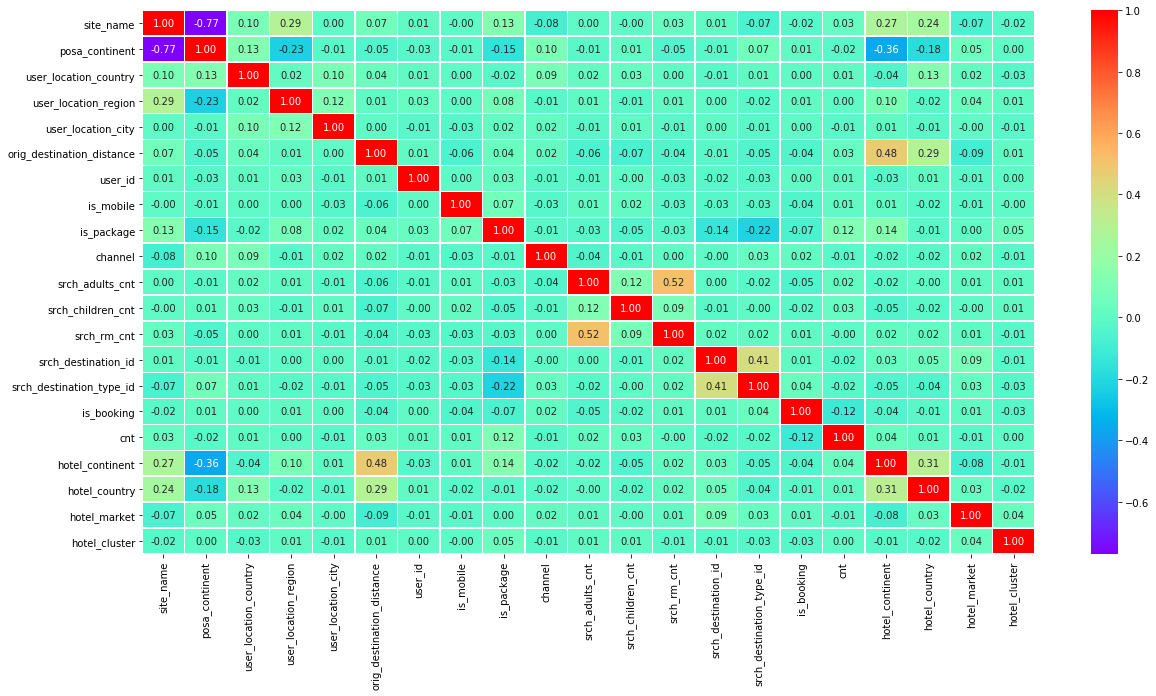

In [373]:
corr = train_data_copy.corr()
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(round(corr, 2).iloc[:, :], annot=True, linewidths=.5, ax=ax, cmap="rainbow",fmt='.2f')

### Most number of hotels in the Country

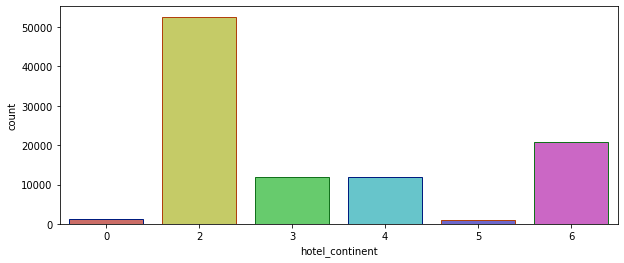

In [374]:
plt.figure(figsize=(10, 4))
sns.countplot(x='hotel_continent', palette='hls',data=train_data, edgecolor=sns.color_palette("dark", 3))

### User Location Country

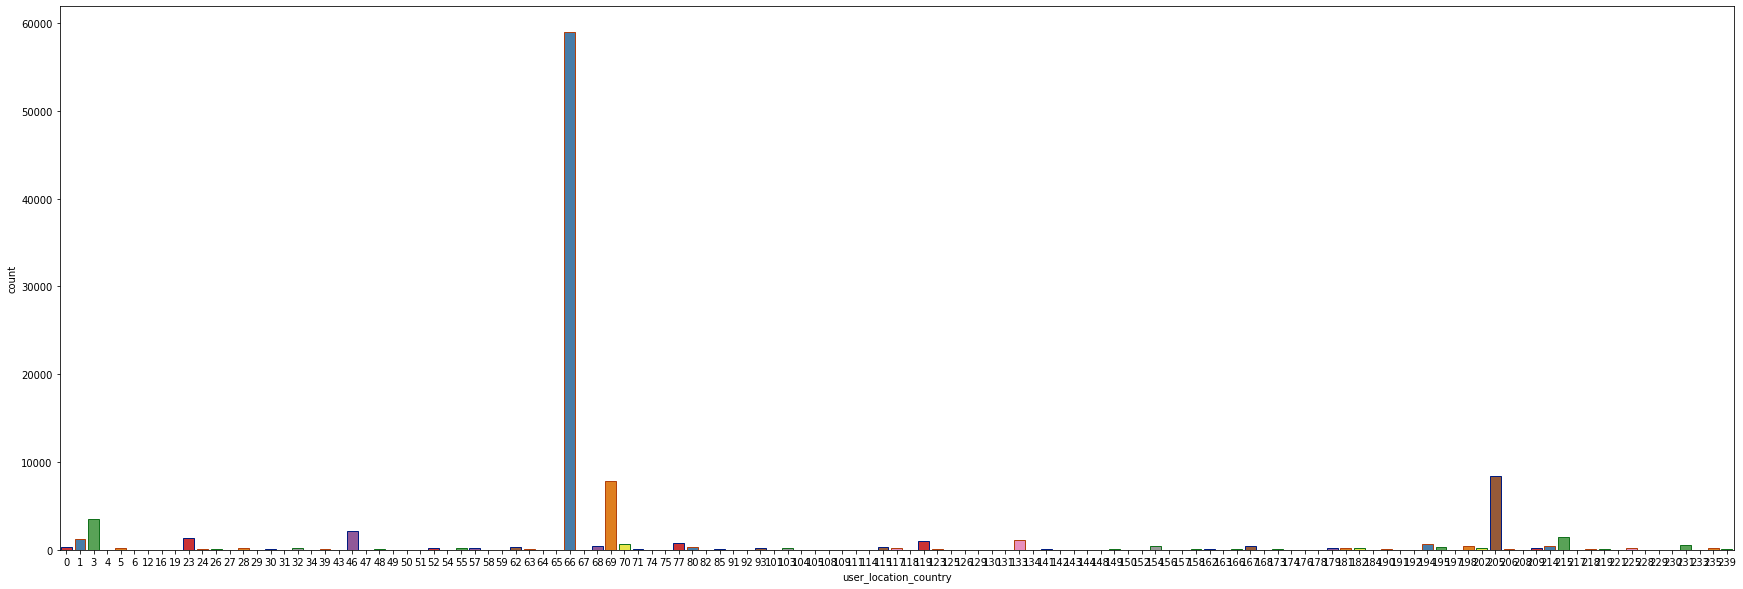

In [375]:
plt.figure(figsize=(30, 10))
sns.countplot(x=train_data['user_location_country'],palette="Set1", edgecolor=sns.color_palette("dark", 3))

### Top 10 User Countries

In [376]:
top_ten_user_countries = train_data.groupby('user_location_country')['user_location_region'].count().sort_values(ascending=False)[:10]

In [377]:
top_ten_user_countries

user_location_country
66     58956
205     8363
69      7895
3       3535
46      2195
215     1428
23      1331
1       1185
133     1155
119      969
Name: user_location_region, dtype: int64

### Total Number of Bookings over Date

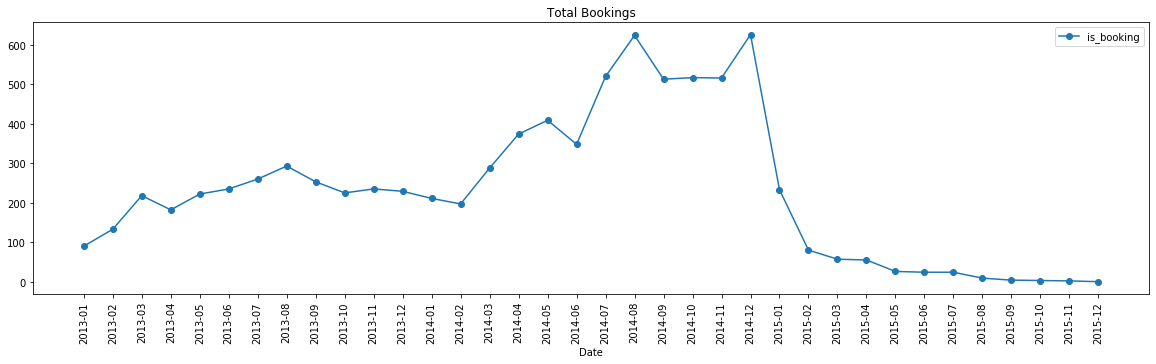

In [378]:
train_data['Date']  = train_data['srch_ci'].apply(lambda x: (str(x)[:7]) if x == x else np.nan)
date_bookings  = train_data.groupby('Date')["is_booking"].sum()
ax1 = date_bookings.plot(legend=True,marker='o',title="Total Bookings", figsize=(20,5)) 
ax1.set_xticks(range(len(date_bookings)))
xlabels = ax1.set_xticklabels(date_bookings.index.tolist(), rotation=90)

### Creating a new dataframe with user_id, hotel_cluster and is_booking fields

In [379]:
new_df = data[['user_id', 'hotel_cluster', 'is_booking']]

In [380]:
new_df.head()

user_id  hotel_cluster  is_booking
0       12              1           0
1       12              1           1
2       12              1           0
3       93             80           0
4       93             21           0

In [381]:
new_df.columns = ['user_id', 'hotel_id', 'booking']
new_df = new_df.sort_values(['user_id', 'hotel_id'])
new_df = new_df.reset_index().drop('index', axis = 1)
new_df.head()

user_id  hotel_id  booking
0       12         1        0
1       12         1        1
2       12         1        0
3       93        21        0
4       93        80        0

In [382]:
booked_hotels = new_df.groupby(['user_id', 'hotel_id']).booking.transform(max)
new_df = new_df.loc[new_df.booking == booked_hotels]
new_df.drop_duplicates(keep = 'first', inplace = True)
new_df= new_df.reset_index().drop('index', axis = 1)
new_df.head()

user_id  hotel_id  booking
0       12         1        1
1       93        21        0
2       93        80        0
3       93        92        0
4      501        10        0

### Calculated each of the hotel cluster's mean to find similar hotel clusters

In [383]:
bookings = pd.DataFrame(new_df.groupby(['hotel_id'])['booking'].mean())
bookings

booking
hotel_id          
0         0.117794
1         0.252396
2         0.209877
3         0.113043
4         0.184035
...            ...
95        0.229310
96        0.076037
97        0.149160
98        0.201117
99        0.152216

[100 rows x 1 columns]

In [384]:
bookings_matrix = new_df.pivot_table(index = 'user_id', columns = 'hotel_id', values = 'booking')
bookings_matrix.head()

hotel_id  0    1    2   3   4   5   6   7   8   9   ...  90  91   92  93   94  \
user_id                                             ...                         
12       NaN  1.0  NaN NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN  NaN NaN  NaN   
93       NaN  NaN  NaN NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN  0.0 NaN  NaN   
501      NaN  NaN  NaN NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN  NaN NaN  NaN   
756      NaN  NaN  1.0 NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN  NaN NaN  0.0   
776      NaN  NaN  NaN NaN NaN NaN NaN NaN NaN NaN  ... NaN NaN  NaN NaN  NaN   

hotel_id  95  96  97   98  99  
user_id                        
12       NaN NaN NaN  NaN NaN  
93       NaN NaN NaN  NaN NaN  
501      NaN NaN NaN  0.0 NaN  
756      NaN NaN NaN  NaN NaN  
776      NaN NaN NaN  NaN NaN  

[5 rows x 100 columns]

In [385]:
bookings_matrix = bookings_matrix.fillna(0)
bookings_matrix

hotel_id   0    1    2    3    4    5    6    7    8    9   ...   90   91  \
user_id                                                     ...             
12        0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
93        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
501       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
756       0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
776       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
...       ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
390183    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
390286    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
390390    0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  0.0  0.0   
390810    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
391007    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   

hotel_id   92   93   94   95   96   97   98   99  
user_id                                           
12        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
93        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
501       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
756       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
776       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
...       ...  ...  ...  ...  ...  ...  ...  ...  
390183    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
390286    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
390390    0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  
390810    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
391007    0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  

[3478 rows x 100 columns]

### Finding similar hotel clusters

In [386]:
def find_similar_hotel_clusters(hotel_cluster): 
    item_user_bookings = bookings_matrix[hotel_cluster]
    hotel_correlation = bookings_matrix.corrwith(item_user_bookings)
    corr_clusterid = pd.DataFrame(hotel_correlation, columns=['correlation_value'])
    corr_clusterid.loc[~(corr_clusterid==0).all(axis=1)]
    corr_clusterid = corr_clusterid.round({'correlation_value': 2})
    return corr_clusterid.sort_values('correlation_value',ascending=False).head(n = 5)

In [389]:
find_similar_hotel_clusters(65)

correlation_value
hotel_id                   
65                     1.00
56                     0.08
66                     0.06
23                     0.05
1                      0.05

### What are we predicting?

#### The objective is to predict which hotel_cluster a user will book given the information in their search. There are 100 clusters in total.

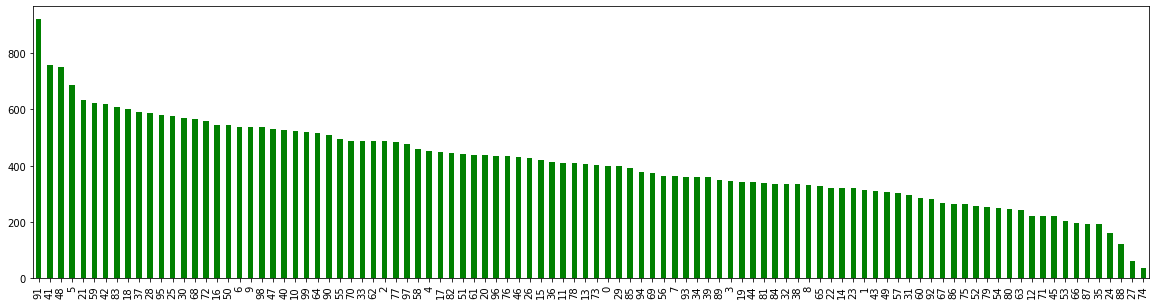

In [390]:
new_df['hotel_id'].value_counts().plot(kind='bar',color="green",figsize=(20,5))

## Collaborative Filtering using Cosine Similarity

In [391]:
users_count, hotels_count = new_df.user_id.unique().shape[0], new_df.hotel_id.unique().shape[0]

In [392]:
print("The no of unique users = ",users_count)
print("The no of hotel clusters = ",hotels_count)

The no of unique users =  3478
The no of hotel clusters =  100


In [393]:
def map_ids_to_idx(df):
    user_idx = np.arange(0, users_count)
    hotel_idx = np.arange(0, hotels_count)
    
    idx_user_df = pd.DataFrame(df.user_id.unique(), columns=["user"])
    idx_user_df["idx"] = user_idx
    
    idx_hotel_df = pd.DataFrame(df.hotel_id.unique(), columns=["hotel"])
    idx_hotel_df["idx"] = hotel_idx
    
    df["hotel_index"] = df["hotel_id"].map(idx_hotel_df.set_index('hotel')["idx"]).fillna(0)
    df["user_index"] = df["user_id"].map(idx_user_df.set_index('user')["idx"]).fillna(0)

    return df

In [394]:
new_df = map_ids_to_idx(new_df)
new_df

user_id  hotel_id  booking  hotel_index  user_index
0           12         1        1            0           0
1           93        21        0            1           1
2           93        80        0            2           1
3           93        92        0            3           1
4          501        10        0            4           2
...        ...       ...      ...          ...         ...
40806   391007        81        0           29        3477
40807   391007        85        0           31        3477
40808   391007        90        0           62        3477
40809   391007        93        0           86        3477
40810   391007        95        1           41        3477

[40811 rows x 5 columns]

### Splitting the data into training and testing

In [395]:
train_data, test_data = train_test_split(new_df, test_size = 0.3)

In [396]:
utility_matrix = np.zeros((users_count, hotels_count))
for row in new_df.itertuples():
    utility_matrix[row[5], row[4]] = row[3]
utility_matrix

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### Creating utility matrix for training data and testing data

In [397]:
train_utility_matrix = np.zeros((users_count, hotels_count))
for row in train_data.itertuples():
    train_utility_matrix[row[5], row[4]] = row[3]
train_utility_matrix

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [398]:
test_utility_matrix = np.zeros((users_count, hotels_count))
for row in test_data.itertuples():
    test_utility_matrix[row[5], row[4]] = row[3]
test_utility_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### Calculating the cosine similarity

In [399]:
similarity_btw_users = pairwise_distances(train_utility_matrix, metric = 'cosine')
similarity_btw_users

array([[0., 1., 1., ..., 1., 1., 1.],
       [1., 0., 1., ..., 1., 1., 1.],
       [1., 1., 0., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 0., 1., 1.],
       [1., 1., 1., ..., 1., 0., 1.],
       [1., 1., 1., ..., 1., 1., 0.]])

In [400]:
transpose_utility_matrix = train_utility_matrix.T
similarity_btw_items = pairwise_distances(transpose_utility_matrix, metric = 'cosine')
similarity_btw_items

array([[0.        , 0.98245884, 1.        , ..., 1.        , 0.97113249,
        1.        ],
       [0.98245884, 0.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 0.        , ..., 1.        , 1.        ,
        0.87596527],
       ...,
       [1.        , 1.        , 1.        , ..., 0.        , 1.        ,
        0.5527864 ],
       [0.97113249, 1.        , 1.        , ..., 1.        , 0.        ,
        1.        ],
       [1.        , 1.        , 0.87596527, ..., 0.5527864 , 1.        ,
        0.        ]])

### Performing predictions based on cosine similarity

In [401]:
def user_prediction(matrix, similarity_measure):
    avg_user_booking = matrix.mean(axis = 1)
    diff_of_bookings = (matrix - avg_user_booking[:, np.newaxis])
    pred = avg_user_booking[:, np.newaxis] + similarity_measure.dot(diff_of_bookings) / np.array([np.abs(similarity_measure).sum(axis=1)]).T
    return pred

In [402]:
user_pred = user_prediction(train_utility_matrix, similarity_btw_users)

In [403]:
user_pred

array([[ 0.00159587,  0.01583226,  0.00081599, ..., -0.00266865,
         0.00386505, -0.00150711],
       [ 0.00128847,  0.00560253, -0.00935289, ..., -0.01280414,
        -0.00618924, -0.01165372],
       [ 0.00128847,  0.00560253, -0.00935289, ..., -0.01280414,
        -0.00618924, -0.01165372],
       ...,
       [ 0.02150505,  0.02580772,  0.01087888, ...,  0.00739931,
         0.01402664,  0.00855916],
       [ 0.00128847,  0.00560253, -0.00935289, ..., -0.01280414,
        -0.00618924, -0.01165372],
       [ 0.01144941,  0.01544847,  0.00077944, ..., -0.00251954,
         0.00419943, -0.00135102]])

In [404]:
def item_prediction(matrix, similarity_measure):
    pred = matrix.dot(similarity_measure) / np.array([np.abs(similarity_measure).sum(axis=1)])
    return pred

In [405]:
item_pred = item_prediction(train_utility_matrix, similarity_btw_items)

In [406]:
item_pred.shape

(3478, 100)

In [407]:
def rmse_value(predicted, test):
    predicted = predicted[test.nonzero()].flatten()
    test = test[test.nonzero()].flatten()
    return sqrt(mean_squared_error(predicted, test))

def mae_value(predicted, test):
    predicted = predicted[test.nonzero()].flatten()
    test = test[test.nonzero()].flatten()
    return sqrt(mean_absolute_error(predicted, test))

#### The RMSE and MAE of user based CF 

In [408]:
print("RMSE = ", rmse_value(user_pred, test_utility_matrix))
print("MAE = ", mae_value(user_pred, test_utility_matrix))

RMSE =  0.961462353405443
MAE =  0.9800656180077009


#### The RMSE and MAE of item based CF

In [409]:
print("RMSE = ", rmse_value(item_pred, test_utility_matrix))
print("MAE = ", mae_value(item_pred, test_utility_matrix))

RMSE =  0.9661079663699542
MAE =  0.982456166299965


In [410]:
reader = Reader()
bookings_data = Dataset.load_from_df(new_df[['user_id', 'hotel_id', 'booking']], reader)

In [411]:
algorithm_1 = KNNBaseline()
res_1 = cross_validate(algorithm_1, bookings_data, measures=['RMSE', 'MAE'], cv = 5, verbose=True)

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBaseline on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9190  0.9136  0.9160  0.9188  0.9176  0.9170  0.0020  
MAE (testset)     0.8445  0.8347  0.8390  0.8442  0.8421  0.8409  0.0037  
Fit time          1.43    1.65    1.28    1.27    1.26    1.38    0.15    
Test time         4.03    4.10    3.91    3.92    3.92    3.98    0.08    


In [412]:
algorithm_2 = SVD()
res_2 = cross_validate(algorithm_2, bookings_data, measures=['RMSE', 'MAE'], cv = 5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9161  0.9162  0.9165  0.9181  0.9182  0.9170  0.0009  
MAE (testset)     0.8392  0.8394  0.8400  0.8429  0.8431  0.8409  0.0017  
Fit time          2.89    3.31    2.82    2.75    2.35    2.82    0.31    
Test time         0.08    0.08    0.20    0.06    0.06    0.10    0.05    


In [413]:
algorithm_3 = CoClustering()
res_3 = cross_validate(algorithm_3, bookings_data, measures=['RMSE', 'MAE'], cv = 5, verbose=True)

Evaluating RMSE, MAE of algorithm CoClustering on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9188  0.9157  0.9171  0.9149  0.9199  0.9173  0.0019  
MAE (testset)     0.8441  0.8383  0.8406  0.8369  0.8463  0.8413  0.0035  
Fit time          1.71    1.60    1.82    3.09    2.62    2.17    0.58    
Test time         0.05    0.06    0.06    0.11    0.09    0.08    0.02    


In [414]:
def avg_rmse(result):
    return sum(result['test_rmse']) / 5

In [415]:
avg_rmse(res_1)

0.9170041765133432

In [416]:
avg_rmse(res_2)

0.9170059384719658

In [417]:
avg_rmse(res_3)

0.9172828324357443

In [418]:
param_grid = {'n_epochs': [5, 10, 30], 'lr_all': [0.002, 0.006],
              'reg_all': [0.05, 0.4, 0.6], 'n_factors' : [10, 20, 30]}

gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=5)

gs.fit(bookings_data)
print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

0.9170060686548215
{'n_epochs': 5, 'lr_all': 0.002, 'reg_all': 0.05, 'n_factors': 10}


In [253]:
train_bookings_data, test_bookings_data = train_test_split(bookings_data, test_size = 0.3)

In [254]:
svd_algo = SVD(n_factors = 10, n_epochs = 5, lr_all = 0.002, reg_all = 0.05)
svd_algo.fit(train_bookings_data)

In [261]:
predictions = svd_algo.test(test_bookings_data)
print("Accuracy = ",accuracy.rmse(predictions))

RMSE: 0.9158
Accuracy =  0.9158037477594877


In [262]:
predictions[0:5]

[Prediction(uid=186793, iid=72, r_ui=0.0, est=1, details={'was_impossible': False}),
 Prediction(uid=185616, iid=28, r_ui=0.0, est=1, details={'was_impossible': False}),
 Prediction(uid=337490, iid=56, r_ui=1.0, est=1, details={'was_impossible': False}),
 Prediction(uid=6330, iid=36, r_ui=0.0, est=1, details={'was_impossible': False}),
 Prediction(uid=204270, iid=65, r_ui=1.0, est=1, details={'was_impossible': False})]

In [265]:
test_bookings = []
for pred in predictions:
    test_bookings.append(pred[3])

In [286]:
final_test_bookings = pd.DataFrame(predictions)

In [287]:
final_test_bookings =final_test_bookings.drop(columns= ['r_ui', 'details'])

In [288]:
final_test_bookings.columns = ['user_id', 'hotel_id', 'is_booking']

In [289]:
final_test_bookings.head()

user_id  hotel_id  is_booking
0   186793        72           1
1   185616        28           1
2   337490        56           1
3     6330        36           1
4   204270        65           1